In [1]:

import datetime

import copy

import random


from dateutil.relativedelta import relativedelta



In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('seaborn')
# plt.style.use(['dark_background', 'ggplot'])

import seaborn as sns
# sns.set()

# import scipy
# import scipy.stats as stats


# # sympy = symbolic math in Python
# import sympy as sym
# import sympy.plotting.plot as symplot


# make the equations look nicer

# from IPython.display import display
# display.set_matplotlib_formats('svg') # Deprecated since version 7.23

# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


%config InlineBackend.set_matplotlib_formats = ["svg"]
%config InlineBackend.figure_formats = ["svg"]




In [3]:

import sklearn


from sklearn.model_selection import train_test_split


# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler     # <------------ (-1.0, 1.0)
# from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error


from imblearn.over_sampling import SMOTE




In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader





torch.__version__

'1.12.1+cu113'

In [5]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
def print_score(shape, yHat, y, yHat_test, yy):
    
    
    n, p = shape
    
    R2 = r2_score(y.detach().numpy(), yHat.detach().numpy())
    
    Adj_r2 = 1 - (1 - R2)  *  (n - 1) / (n - p - 1)
    
    print(f'Adjusted R-Squared(y, yHat): {Adj_r2:0.4f}\n\n')
    # r2_score(yy.detach().numpy(), yHat_test.detach().numpy())
    #  R^2 score is not well-defined with less than two samples
    
    
    print(f'mean_absolute_error(y, yHat):',
          f'{mean_absolute_error(y.detach().numpy(), yHat.detach().numpy()):0.4f}\n')
    print(f'mean_absolute_error(yy, yHat_test):',
          f'{mean_absolute_error(yy.detach().numpy(), yHat_test.detach().numpy()):0.4f}\n\n')
    
    
    print(f'mean_squared_error(y, yHat):',
          f'{mean_squared_error(y.detach().numpy(), yHat.detach().numpy()):0.4f}\n')
    print(f'mean_squared_error(yy, yHat_test):',
          f'{mean_squared_error(yy.detach().numpy(), yHat_test.detach().numpy()):0.4f}\n\n')
    
    
    print(f'mean_squared_log_error(y, yHat):',
          f'{mean_squared_log_error(y.detach().numpy(), yHat.detach().numpy()):0.4f}\n')
    print(f'mean_squared_log_error(yy, yHat_test):',
          f'{mean_squared_log_error(yy.detach().numpy(), yHat_test.detach().numpy()):0.4f}\n\n')
    
    
    
    print(f'RMSE(y, yHat):',
          f'{np.sqrt( mean_squared_error(y.detach().numpy(), yHat.detach().numpy()) ):0.4f}\n')
    print(f'RMSE(yy, yHat_test):',
          f'{np.sqrt( mean_squared_error(yy.detach().numpy(), yHat_test.detach().numpy()) ):0.4f}\n\n')
    
    
    
    
    

In [8]:
# date = np.datetime64("2000-01-01")
# date_strings = date.astype(str).split('-'). 
# # >> ['2000', '01', '01']

# year_int = int(date_strings[0])

In [9]:
!wget -nc https://raw.githubusercontent.com/Proteinea/dl-challenge-2/main/data/data.txt
!wget -nc https://raw.githubusercontent.com/Proteinea/dl-challenge-2/main/data/example_input.txt

--2022-08-18 13:54:18--  https://raw.githubusercontent.com/Proteinea/dl-challenge-2/main/data/data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5230713 (5.0M) [text/plain]
Saving to: ‘data.txt’

data.txt            100%[===================>]   4.99M  --.-KB/s    in 0.04s   

2022-08-18 13:54:20 (122 MB/s) - ‘data.txt’ saved [5230713/5230713]

--2022-08-18 13:54:21--  https://raw.githubusercontent.com/Proteinea/dl-challenge-2/main/data/example_input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37732 (37K) [text/plain]

In [10]:
!ls

data.txt  example_input.txt  sample_data


'text.txt'

[ 1-1-1800 to 31-12-2200 ]

[day condition] [month condition] [leap year condition] [decade condition] date

[MON] [DEC] [False] [196] 3-12-1962
[THU] [DEC] [True] [204] 3-12-2048
[WED] [JAN] [False] [181] 10-1-1810

In [11]:
# data = np.loadtxt(open('text.txt','r'),delimiter=' ')
# ori = pd.read_csv('./data/data.txt', sep=' ', header=None)

ori = pd.read_csv('data.txt', sep=' ', header=None)


In [12]:
ori.columns = ['day', 'month', 'leap_year', 'decade', 'date']

In [13]:
ori

,day,month,leap_year,decade,date
0,[WED],[JAN],[False],[180],1-1-1800
1,[THU],[JAN],[False],[180],1-1-1801
2,[FRI],[JAN],[False],[180],1-1-1802
3,[SAT],[JAN],[False],[180],1-1-1803
4,[SUN],[JAN],[True],[180],1-1-1804
...,...,...,...,...,...
146457,[SAT],[DEC],[True],[219],31-12-2196
146458,[SUN],[DEC],[False],[219],31-12-2197
146459,[MON],[DEC],[False],[219],31-12-2198
146460,[TUE],[DEC],[False],[219],31-12-2199


In [14]:
# data.date = pd.to_datetime(data.date, format='%d-%m-%Y', infer_datetime_format=False)
# # pd.to_datetime(data.date, infer_datetime_format=False)

In [15]:
ori.dtypes

day          object
month        object
leap_year    object
decade       object
date         object
dtype: object

In [16]:
# data_backup = copy.deepcopy(ori)
data = copy.deepcopy(ori)

In [17]:
data

,day,month,leap_year,decade,date
0,[WED],[JAN],[False],[180],1-1-1800
1,[THU],[JAN],[False],[180],1-1-1801
2,[FRI],[JAN],[False],[180],1-1-1802
3,[SAT],[JAN],[False],[180],1-1-1803
4,[SUN],[JAN],[True],[180],1-1-1804
...,...,...,...,...,...
146457,[SAT],[DEC],[True],[219],31-12-2196
146458,[SUN],[DEC],[False],[219],31-12-2197
146459,[MON],[DEC],[False],[219],31-12-2198
146460,[TUE],[DEC],[False],[219],31-12-2199


In [18]:
data.date

0           1-1-1800
1           1-1-1801
2           1-1-1802
3           1-1-1803
4           1-1-1804
             ...    
146457    31-12-2196
146458    31-12-2197
146459    31-12-2198
146460    31-12-2199
146461    31-12-2200
Name: date, Length: 146462, dtype: object

In [19]:
# # data['date'] = pd.date_range('3-12-2048', periods=10)
# # data['date'] = pd.date_range('12-3-1962', periods=10)

# # 1-1-1800 to 31-12-2200
# data['date'] = pd.date_range(start='1-1-1800',end='12-31-2200')


data.date = pd.to_datetime(data.date, format='%d-%m-%Y', infer_datetime_format=False)

# # data.date = data.date.dt.strftime('%d-%m-%Y')
# # data.date = pd.to_datetime(data.date.dt.strftime('%d-%m-%Y'), format='%d-%m-%Y', infer_datetime_format=False)



In [20]:
data.dtypes

day                  object
month                object
leap_year            object
decade               object
date         datetime64[ns]
dtype: object

In [21]:
data

,day,month,leap_year,decade,date
0,[WED],[JAN],[False],[180],1800-01-01
1,[THU],[JAN],[False],[180],1801-01-01
2,[FRI],[JAN],[False],[180],1802-01-01
3,[SAT],[JAN],[False],[180],1803-01-01
4,[SUN],[JAN],[True],[180],1804-01-01
...,...,...,...,...,...
146457,[SAT],[DEC],[True],[219],2196-12-31
146458,[SUN],[DEC],[False],[219],2197-12-31
146459,[MON],[DEC],[False],[219],2198-12-31
146460,[TUE],[DEC],[False],[219],2199-12-31


In [22]:
map_leap_year = {'[False]': int(0), '[True]' : int(1)}

data.leap_year = data.leap_year.map(map_leap_year)

# data.leap_year = data.leap_year.astype(np.float64)

In [23]:
data

,day,month,leap_year,decade,date
0,[WED],[JAN],0,[180],1800-01-01
1,[THU],[JAN],0,[180],1801-01-01
2,[FRI],[JAN],0,[180],1802-01-01
3,[SAT],[JAN],0,[180],1803-01-01
4,[SUN],[JAN],1,[180],1804-01-01
...,...,...,...,...,...
146457,[SAT],[DEC],1,[219],2196-12-31
146458,[SUN],[DEC],0,[219],2197-12-31
146459,[MON],[DEC],0,[219],2198-12-31
146460,[TUE],[DEC],0,[219],2199-12-31


date -> timestamp

In [24]:
data.date.iloc[0]

Timestamp('1800-01-01 00:00:00')

In [25]:
data['date_int'] = data['date'].dt.strftime("%Y%m%d").astype(np.int64)

# data['date_str'] = data['date'].dt.strftime("%Y%m%d")


In [26]:
# data['date_int'].map(str)
# data['date_int'].astype(str)

In [27]:
# date_max = data.date_int.max()
# data['date_normalized'] = data.date_int / date_max

In [28]:
data

,day,month,leap_year,decade,date,date_int
0,[WED],[JAN],0,[180],1800-01-01,18000101
1,[THU],[JAN],0,[180],1801-01-01,18010101
2,[FRI],[JAN],0,[180],1802-01-01,18020101
3,[SAT],[JAN],0,[180],1803-01-01,18030101
4,[SUN],[JAN],1,[180],1804-01-01,18040101
...,...,...,...,...,...,...
146457,[SAT],[DEC],1,[219],2196-12-31,21961231
146458,[SUN],[DEC],0,[219],2197-12-31,21971231
146459,[MON],[DEC],0,[219],2198-12-31,21981231
146460,[TUE],[DEC],0,[219],2199-12-31,21991231


In [29]:
x = data.decade.iloc[0]
x

'[180]'

In [30]:
x.strip('[]')

'180'

In [31]:
data.decade = data.decade.apply(lambda x: x.strip('[]')).astype('int64')

In [32]:
# data.day = data.day.apply(lambda x: x.strip('[]'))
# data.month = data.month.apply(lambda x: x.strip('[]'))

In [33]:
map_day = {'[SAT]': int(0),
           '[SUN]': int(1),
           '[MON]': int(2),
           '[TUE]': int(3),
           '[WED]': int(4),
           '[THU]': int(5),
           '[FRI]': int(6)}

In [34]:
data['day_code'] = data.day.map(map_day)

In [35]:
scaler_day = RobustScaler()

x = data.day_code.values.reshape(-1, 1)

data['day_scaled'] = scaler_day.fit_transform(x).flatten()


In [36]:
data

,day,month,leap_year,decade,date,date_int,day_code,day_scaled
0,[WED],[JAN],0,180,1800-01-01,18000101,4,0.25
1,[THU],[JAN],0,180,1801-01-01,18010101,5,0.50
2,[FRI],[JAN],0,180,1802-01-01,18020101,6,0.75
3,[SAT],[JAN],0,180,1803-01-01,18030101,0,-0.75
4,[SUN],[JAN],1,180,1804-01-01,18040101,1,-0.50
...,...,...,...,...,...,...,...,...
146457,[SAT],[DEC],1,219,2196-12-31,21961231,0,-0.75
146458,[SUN],[DEC],0,219,2197-12-31,21971231,1,-0.50
146459,[MON],[DEC],0,219,2198-12-31,21981231,2,-0.25
146460,[TUE],[DEC],0,219,2199-12-31,21991231,3,0.00


In [37]:
data['day_sin'] = np.sin(data['day_code'] * (2 * np.pi / 7))
data['day_cos'] = np.cos(data['day_code'] * (2 * np.pi / 7))

In [38]:
data

,day,month,leap_year,decade,date,date_int,day_code,day_scaled,day_sin,day_cos
0,[WED],[JAN],0,180,1800-01-01,18000101,4,0.25,-0.433884,-0.900969
1,[THU],[JAN],0,180,1801-01-01,18010101,5,0.50,-0.974928,-0.222521
2,[FRI],[JAN],0,180,1802-01-01,18020101,6,0.75,-0.781831,0.623490
3,[SAT],[JAN],0,180,1803-01-01,18030101,0,-0.75,0.000000,1.000000
4,[SUN],[JAN],1,180,1804-01-01,18040101,1,-0.50,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...
146457,[SAT],[DEC],1,219,2196-12-31,21961231,0,-0.75,0.000000,1.000000
146458,[SUN],[DEC],0,219,2197-12-31,21971231,1,-0.50,0.781831,0.623490
146459,[MON],[DEC],0,219,2198-12-31,21981231,2,-0.25,0.974928,-0.222521
146460,[TUE],[DEC],0,219,2199-12-31,21991231,3,0.00,0.433884,-0.900969


In [39]:
map_month = {'[JAN]': int(0),
             '[FEB]': int(1),
             '[MAR]': int(2),
             '[APR]': int(3),
             '[MAY]': int(4),
             '[JUN]': int(5),
             '[JUL]': int(6),
             '[AUG]': int(7),
             '[SEP]': int(8),
             '[OCT]': int(9),
             '[NOV]': int(10),
             '[DEC]': int(11)}

In [40]:
data['month_code'] = data.month.map(map_month)

In [41]:
scaler_month = RobustScaler()

x = data.month_code.values.reshape(-1, 1)

data['month_scaled'] = scaler_month.fit_transform(x).flatten()


In [42]:
data['month_sin'] = np.sin(data['month_code'] * (2 * np.pi / 12))
data['month_cos'] = np.cos(data['month_code'] * (2 * np.pi / 12))

In [43]:
data

,day,month,leap_year,decade,date,date_int,day_code,day_scaled,day_sin,day_cos,month_code,month_scaled,month_sin,month_cos
0,[WED],[JAN],0,180,1800-01-01,18000101,4,0.25,-0.433884,-0.900969,0,-1.000000,0.0,1.000000
1,[THU],[JAN],0,180,1801-01-01,18010101,5,0.50,-0.974928,-0.222521,0,-1.000000,0.0,1.000000
2,[FRI],[JAN],0,180,1802-01-01,18020101,6,0.75,-0.781831,0.623490,0,-1.000000,0.0,1.000000
3,[SAT],[JAN],0,180,1803-01-01,18030101,0,-0.75,0.000000,1.000000,0,-1.000000,0.0,1.000000
4,[SUN],[JAN],1,180,1804-01-01,18040101,1,-0.50,0.781831,0.623490,0,-1.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,[SAT],[DEC],1,219,2196-12-31,21961231,0,-0.75,0.000000,1.000000,11,0.833333,-0.5,0.866025
146458,[SUN],[DEC],0,219,2197-12-31,21971231,1,-0.50,0.781831,0.623490,11,0.833333,-0.5,0.866025
146459,[MON],[DEC],0,219,2198-12-31,21981231,2,-0.25,0.974928,-0.222521,11,0.833333,-0.5,0.866025
146460,[TUE],[DEC],0,219,2199-12-31,21991231,3,0.00,0.433884,-0.900969,11,0.833333,-0.5,0.866025


In [44]:
scaler_decade = RobustScaler()

x = data.decade.values.reshape(-1, 1)

data['decade_scaled'] = scaler_decade.fit_transform(x).flatten()


In [45]:
# alpha = len(data.decade.unique())
alpha = (data.decade.iloc[-1] - data.decade.iloc[0]) + 1

data['decade_sin'] = np.sin(data['decade'] * (2 * np.pi / alpha))
data['decade_cos'] = np.cos(data['decade'] * (2 * np.pi / alpha))

In [46]:
data

,day,month,leap_year,decade,date,date_int,day_code,day_scaled,day_sin,day_cos,month_code,month_scaled,month_sin,month_cos,decade_scaled,decade_sin,decade_cos
0,[WED],[JAN],0,180,1800-01-01,18000101,4,0.25,-0.433884,-0.900969,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
1,[THU],[JAN],0,180,1801-01-01,18010101,5,0.50,-0.974928,-0.222521,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
2,[FRI],[JAN],0,180,1802-01-01,18020101,6,0.75,-0.781831,0.623490,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
3,[SAT],[JAN],0,180,1803-01-01,18030101,0,-0.75,0.000000,1.000000,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
4,[SUN],[JAN],1,180,1804-01-01,18040101,1,-0.50,0.781831,0.623490,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,[SAT],[DEC],1,219,2196-12-31,21961231,0,-0.75,0.000000,1.000000,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568
146458,[SUN],[DEC],0,219,2197-12-31,21971231,1,-0.50,0.781831,0.623490,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568
146459,[MON],[DEC],0,219,2198-12-31,21981231,2,-0.25,0.974928,-0.222521,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568
146460,[TUE],[DEC],0,219,2199-12-31,21991231,3,0.00,0.433884,-0.900969,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568


In [47]:
data.dtypes

day                      object
month                    object
leap_year                 int64
decade                    int64
date             datetime64[ns]
date_int                  int64
day_code                  int64
day_scaled              float64
day_sin                 float64
day_cos                 float64
month_code                int64
month_scaled            float64
month_sin               float64
month_cos               float64
decade_scaled           float64
decade_sin              float64
decade_cos              float64
dtype: object

In [48]:
# data.date_normalized.min(), data.date_normalized.max()

In [49]:
# round(data.date_normalized.min()), round(data.date_normalized.max())

In [50]:
round(data.day_scaled.min()), round(data.day_scaled.max())

(-1, 1)

In [51]:
round(data.day_sin.min()), round(data.day_sin.max())

(-1, 1)

In [52]:
round(data.day_cos.min()), round(data.day_cos.max())

(-1, 1)

In [53]:
round(data.month_scaled.min()), round(data.month_scaled.max())

(-1, 1)

In [54]:
round(data.month_sin.min()), round(data.month_sin.max())

(-1, 1)

In [55]:
round(data.month_cos.min()), round(data.month_cos.max())

(-1, 1)

In [56]:
data.leap_year.min(), data.leap_year.max()

(0, 1)

In [57]:
round(data.decade_scaled.min()), round(data.decade_scaled.max())

(-1, 1)

In [58]:
round(data.decade_sin.min()), round(data.decade_sin.max())

(-1, 1)

In [59]:
round(data.decade_cos.min()), round(data.decade_cos.max())

(-1, 1)

Boxplot

In [60]:
# fig,ax = plt.subplots(1,figsize=(17,4))

# ax = sns.boxplot(data=data[['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
#           'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']])

# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# plt.show()

In [61]:
data

,day,month,leap_year,decade,date,date_int,day_code,day_scaled,day_sin,day_cos,month_code,month_scaled,month_sin,month_cos,decade_scaled,decade_sin,decade_cos
0,[WED],[JAN],0,180,1800-01-01,18000101,4,0.25,-0.433884,-0.900969,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
1,[THU],[JAN],0,180,1801-01-01,18010101,5,0.50,-0.974928,-0.222521,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
2,[FRI],[JAN],0,180,1802-01-01,18020101,6,0.75,-0.781831,0.623490,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
3,[SAT],[JAN],0,180,1803-01-01,18030101,0,-0.75,0.000000,1.000000,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
4,[SUN],[JAN],1,180,1804-01-01,18040101,1,-0.50,0.781831,0.623490,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,[SAT],[DEC],1,219,2196-12-31,21961231,0,-0.75,0.000000,1.000000,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568
146458,[SUN],[DEC],0,219,2197-12-31,21971231,1,-0.50,0.781831,0.623490,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568
146459,[MON],[DEC],0,219,2198-12-31,21981231,2,-0.25,0.974928,-0.222521,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568
146460,[TUE],[DEC],0,219,2199-12-31,21991231,3,0.00,0.433884,-0.900969,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568


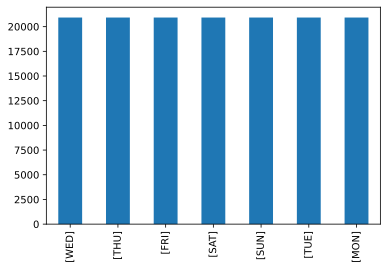

In [62]:
data.day.value_counts().plot(kind="bar")

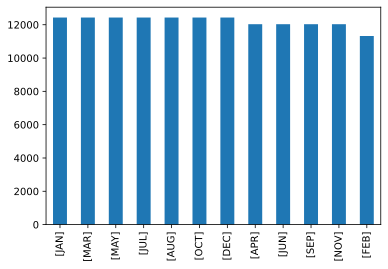

In [63]:
data.month.value_counts().plot(kind="bar")

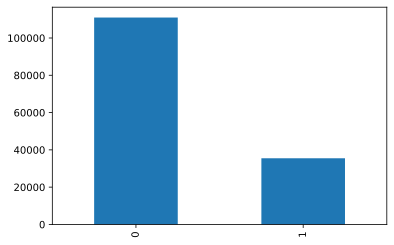

In [64]:
data.leap_year.value_counts().plot(kind="bar")

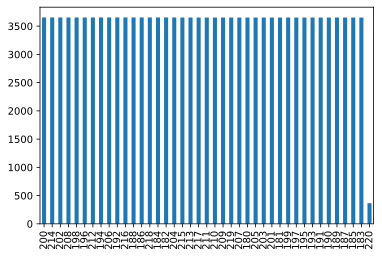

In [65]:
data.decade.value_counts().plot(kind="bar")

In [66]:
data

,day,month,leap_year,decade,date,date_int,day_code,day_scaled,day_sin,day_cos,month_code,month_scaled,month_sin,month_cos,decade_scaled,decade_sin,decade_cos
0,[WED],[JAN],0,180,1800-01-01,18000101,4,0.25,-0.433884,-0.900969,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
1,[THU],[JAN],0,180,1801-01-01,18010101,5,0.50,-0.974928,-0.222521,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
2,[FRI],[JAN],0,180,1802-01-01,18020101,6,0.75,-0.781831,0.623490,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
3,[SAT],[JAN],0,180,1803-01-01,18030101,0,-0.75,0.000000,1.000000,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
4,[SUN],[JAN],1,180,1804-01-01,18040101,1,-0.50,0.781831,0.623490,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,[SAT],[DEC],1,219,2196-12-31,21961231,0,-0.75,0.000000,1.000000,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568
146458,[SUN],[DEC],0,219,2197-12-31,21971231,1,-0.50,0.781831,0.623490,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568
146459,[MON],[DEC],0,219,2198-12-31,21981231,2,-0.25,0.974928,-0.222521,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568
146460,[TUE],[DEC],0,219,2199-12-31,21991231,3,0.00,0.433884,-0.900969,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568


In [67]:
data.dtypes

day                      object
month                    object
leap_year                 int64
decade                    int64
date             datetime64[ns]
date_int                  int64
day_code                  int64
day_scaled              float64
day_sin                 float64
day_cos                 float64
month_code                int64
month_scaled            float64
month_sin               float64
month_cos               float64
decade_scaled           float64
decade_sin              float64
decade_cos              float64
dtype: object

['day_sin', 'day_cos', 'month_sin', 'month_cos', 'leap_year', 'decade_scaled']
['date_timestamp_scaled']

In [68]:
X = data[['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
          'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']].values
X

array([[ 0.25      , -0.43388374, -0.90096887, ..., -1.        ,
         0.63624244, -0.77148918],
       [ 0.5       , -0.97492791, -0.22252093, ..., -1.        ,
         0.63624244, -0.77148918],
       [ 0.75      , -0.78183148,  0.6234898 , ..., -1.        ,
         0.63624244, -0.77148918],
       ...,
       [-0.25      ,  0.97492791, -0.22252093, ...,  0.95      ,
         0.83936543, -0.54356755],
       [ 0.        ,  0.43388374, -0.90096887, ...,  0.95      ,
         0.83936543, -0.54356755],
       [ 0.25      , -0.43388374, -0.90096887, ...,  1.        ,
         0.74655322, -0.6653257 ]])

In [69]:
len(X)

146462

In [70]:
X.shape

(146462, 10)

In [71]:
# Y = data['date_int'].values.reshape(-1, 1)
# Y = np.log(data['date_int'].values.reshape(-1, 1))
# Y = data['date_int'].values.reshape(-1, 1) / data['date_int'].max()


ls = []

for s in data['date_int'].astype(str).to_list():

  l = list(s)

  ls.append(l)



arr = np.array(ls).astype(int)

ll = pd.DataFrame(arr, index=np.arange(len(data['date_int'])), columns=['y1', 'y2', 'y3', 'y4', 'm1', 'm2', 'd1', 'd2'])


Y = ll.values

Y


array([[1, 8, 0, ..., 1, 0, 1],
       [1, 8, 0, ..., 1, 0, 1],
       [1, 8, 0, ..., 1, 0, 1],
       ...,
       [2, 1, 9, ..., 2, 3, 1],
       [2, 1, 9, ..., 2, 3, 1],
       [2, 2, 0, ..., 2, 3, 1]])

In [72]:
len(Y)

146462

In [73]:
Y.shape

(146462, 8)

In [74]:
# # leap = np.where(~X['leap_year'] == 1)[0]
# leap = np.where(X['leap_year'] == 1)[0]

# leap

In [75]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, shuffle=True,
                                                                    random_state=0)

In [76]:
train_dataT = TensorDataset( torch.tensor(train_data).float(), torch.tensor(train_labels).float() )

test_dataT  = TensorDataset( torch.tensor(test_data).float(), torch.tensor(test_labels).float() )



batchsize = 32
# batchsize = 64


train_loader = DataLoader(train_dataT, batch_size=batchsize, drop_last=True)

test_loader  = DataLoader(test_dataT)


In [77]:
print(f'X: {X.shape}\n')
print(f'Y: {Y.shape}\n')

print(f'Train data:   {train_data.shape}\n')
print(f'Train labels: {train_labels.shape}\n')
print(f'Test data:    {test_data.shape}\n')
print(f'Test labels:  {test_labels.shape}')

X: (146462, 10)

Y: (146462, 8)

Train data:   (102523, 10)

Train labels: (102523, 8)

Test data:    (43939, 10)

Test labels:  (43939, 8)


In [78]:
102523 % 32, 102523 % 64

(27, 59)

In [79]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(10, 64)

        self.fc1 = nn.Linear(64, 128)
        self.bnorm1 = nn.BatchNorm1d(128)

        self.fc2 = nn.Linear(128, 512)
        self.bnorm2 = nn.BatchNorm1d(512)

        self.fc3 = nn.Linear(512, 1024)
        self.bnorm3 = nn.BatchNorm1d(1024)

        self.fc4 = nn.Linear(1024, 512)
        self.bnorm4 = nn.BatchNorm1d(512)

        self.fc5 = nn.Linear(512, 128)
        self.bnorm5 = nn.BatchNorm1d(128)

        self.fc6 = nn.Linear(128, 64)
        self.bnorm6 = nn.BatchNorm1d(64)


        self.output = nn.Linear(64, 8)



    def forward(self, x):


        # print(f'training={self.training}')

        x = F.relu( self.input(x) ) # 64

        x = F.relu(self.bnorm1(self.fc1(x))) # 128
        # x = F.dropout(x, p=0.07, training=self.training)

        x = F.relu(self.bnorm2(self.fc2(x))) # 512
        # x = F.dropout(x, p=0.12, training=self.training)

        x = F.relu(self.bnorm3(self.fc3(x))) # 1024
        # x = F.dropout(x, p=0.25, training=self.training)

        x = F.relu(self.bnorm4(self.fc4(x))) # 512
        # x = F.dropout(x, p=0.12, training=self.training)

        x = F.relu(self.bnorm5(self.fc5(x))) # 128
        # x = F.dropout(x, p=0.07, training=self.training)

        x = F.relu(self.bnorm6(self.fc6(x))) # 64
        # x = F.dropout(x, p=0.05, training=self.training)

        x = F.relu(self.output(x)) # 8
        # x = self.output(x)
        


        return x
        


In [80]:
# test_x, test_y = next(iter(train_loader))

# print(f'test_x: {test_x.shape}\n')
# print(f'test_y: {test_y.shape}\n')



In [81]:
def train(model, numepochs):

    numepochs = numepochs

    model = model
    
    
    
    lossfun = nn.MSELoss()
    # lossfun = nn.L1Loss()


    # optimizer = torch.optim.Adam(model.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=1e-5)
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.5, 0.999), weight_decay=1e-1)
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

    # optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), weight_decay=1e-9)


    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.01)
    
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    
    
    
    trainLoss = torch.zeros(numepochs)
    testLoss  = torch.zeros(numepochs)
    trainAcc  = torch.zeros(numepochs)
    # testAcc   = torch.zeros(numepochs)


    for epochi in range(numepochs):

        model.train() # switch to train mode

        batchLoss = []
        batchAcc  = []

        for X,y in train_loader:

            X = X.to(device)
            y = y.to(device)

            yHat = model(X)
            loss = lossfun(yHat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())
            # batchAcc.append( torch.mean(( yHat == y).float() ).item() )
            # batchAcc.append( torch.mean( (torch.abs(yHat - y) < 1).float() ).item() ) # <1 for rounding
            batchAcc.append( r2_score(y.detach().cpu().numpy(), yHat.detach().cpu().numpy()) )
            




        trainLoss[epochi] = np.mean(batchLoss)
        # trainAcc[epochi]  = 100*np.mean(batchAcc)
        trainAcc[epochi]  = np.mean(batchAcc)
        



        model.eval() # switch to test mode

        XX,yy = next(iter(test_loader))

        XX = XX.to(device)
        yy = yy.to(device)

        # forward pass and loss
        with torch.no_grad():
            yHat_test = model(XX)
            loss_test = lossfun(yHat_test, yy)


        testLoss[epochi] = loss_test.item()
        # testAcc[epochi]  = 100*torch.mean( (yHat_test == yy).float() ).item()
        # testAcc[epochi]  = 100*torch.mean( (torch.abs(yHat_test - yy) < 1).float() ).item()
        # testAcc[epochi]  = 100*r2_score(yy.detach().numpy(), yHat_test.detach().numpy())
        


        # if (epochi + 1) % 5 == 0:
        print(f'Epoch {epochi+1}/{numepochs}, Train Loss: {loss.item():0.6f}, Test Loss: {loss_test.item():0.6f}')


        
    return trainLoss.cpu(), testLoss.cpu(), trainAcc.cpu(), yHat.cpu(), y.cpu(), yHat_test.cpu(), yy.cpu()


In [82]:
model = Model().to(device)

# test_hat = model(torch.randn(32,6))
# test_hat = model(test_x)

# print(test_hat.shape)


# # checkpoint = torch.load('checkpoint.pth.tar', map_location=torch.device('cpu'))
# checkpoint = torch.load('checkpoint_half.pth.tar', map_location=torch.device('cpu'))

# model.load_state_dict(checkpoint['model_state_dict'])




In [ ]:
# for p in list(model.named_parameters()):
#     if 'weight' in p[0] and 'bnorm' not in p[0]:
#         nn.init.xavier_normal_(p[1].data)
#         print(p[0])
#         print(p[1].data.shape)

In [83]:
numepochs = 120
# numepochs = 300
# numepochs = 500



trainLoss1, testLoss1, trainAcc1, yHat1, y1, yHat_test1, yy1 = train(model, numepochs)


Epoch 1/120, Train Loss: 2.507965, Test Loss: 2.357785
Epoch 2/120, Train Loss: 2.445185, Test Loss: 2.205106
Epoch 3/120, Train Loss: 2.408722, Test Loss: 2.089826
Epoch 4/120, Train Loss: 2.360607, Test Loss: 2.125216
Epoch 5/120, Train Loss: 2.367944, Test Loss: 2.008972
Epoch 6/120, Train Loss: 2.353453, Test Loss: 1.966699
Epoch 7/120, Train Loss: 2.327424, Test Loss: 1.988318
Epoch 8/120, Train Loss: 2.319540, Test Loss: 1.973851
Epoch 9/120, Train Loss: 2.307599, Test Loss: 1.989388
Epoch 10/120, Train Loss: 2.310573, Test Loss: 1.965093
Epoch 11/120, Train Loss: 2.306724, Test Loss: 1.966587
Epoch 12/120, Train Loss: 2.318141, Test Loss: 1.973196
Epoch 13/120, Train Loss: 2.302895, Test Loss: 1.978483
Epoch 14/120, Train Loss: 2.294433, Test Loss: 1.982434
Epoch 15/120, Train Loss: 2.288211, Test Loss: 1.965482
Epoch 16/120, Train Loss: 2.291320, Test Loss: 1.968217
Epoch 17/120, Train Loss: 2.304884, Test Loss: 1.950907
Epoch 18/120, Train Loss: 2.296584, Test Loss: 1.952195
E

In [84]:
checkpoint = {'model_state_dict'      : model.state_dict(),
              #'model_smote_state_dict': model_smote.state_dict(),

              'scaler_day' : scaler_day,
              'scaler_month' : scaler_month,
              'scaler_decade' : scaler_decade,

              #'scaler_day_smote' : scaler_day_smote,
              #'scaler_month_smote' : scaler_month_smote,
              #'scaler_decade_smote' : scaler_decade_smote,
              
              'alpha': alpha,
              #'alpha_smote': alpha_smote
              }



torch.save(checkpoint, 'checkpoint_half.pth.tar')


In [85]:
# r2_score(y.detach().numpy(), yHat.detach().numpy())
# type(r2_score(y.detach(), yHat.detach()))

In [86]:
# torch.mean( r2_score(y.detach().numpy(), yHat.detach().numpy()) ).item()

In [87]:
trainLoss1, testLoss1, trainAcc1

(tensor([2.7478, 2.3583, 2.2881, 2.2528, 2.2643, 2.2235, 2.2152, 2.2030, 2.1989,
         2.2083, 2.1944, 2.1862, 2.1919, 2.1879, 2.1956, 2.1873, 2.2052, 2.1812,
         2.1963, 2.1839, 2.1823, 2.1885, 2.1945, 2.1876, 2.1948, 2.1873, 2.1906,
         2.1832, 2.1804, 2.1839, 2.1742, 2.1876, 2.1758, 2.1759, 2.1701, 2.1718,
         2.1756, 2.1654, 2.1617, 2.1609, 2.1636, 2.1545, 2.1600, 2.1503, 2.1454,
         2.1479, 2.1413, 2.1392, 2.1275, 2.1224, 2.1157, 2.1102, 2.1003, 2.0940,
         2.0871, 2.0753, 2.0675, 2.0578, 2.0456, 2.0354, 2.0219, 2.0173, 2.0023,
         1.9905, 1.9794, 1.9668, 1.9564, 1.9414, 1.9326, 1.9174, 1.9069, 1.8945,
         1.8861, 1.8708, 1.8597, 1.8480, 1.8370, 1.8267, 1.8110, 1.8005, 1.7873,
         1.7771, 1.7671, 1.7565, 1.7439, 1.7338, 1.7237, 1.7111, 1.7011, 1.6862,
         1.6787, 1.6708, 1.6577, 1.6483, 1.6357, 1.6302, 1.6145, 1.6071, 1.5935,
         1.5892, 1.5764, 1.5703, 1.5555, 1.5503, 1.5429, 1.5273, 1.5191, 1.5089,
         1.4999, 1.4914, 1.4

In [88]:
# batchLoss

In [89]:
# batchAcc

In [90]:
# yHat.shape, y.shape

In [91]:
# yHat_test.shape, yy.shape

In [92]:
yHat1.flatten(), y1.flatten()

(tensor([1.9491, 1.2696, 7.6612, 5.6534, 0.0000, 2.9458, 1.0181, 5.7866, 2.0448,
         0.0000, 7.5972, 8.7025, 0.0000, 1.7185, 1.2178, 4.1327, 2.0760, 0.0000,
         5.3692, 9.1426, 0.0000, 2.9018, 0.9650, 8.0718, 1.9968, 1.4793, 3.7473,
         4.9053, 0.0000, 6.5641, 1.1126, 4.4923, 1.9513, 1.4219, 8.7418, 5.8385,
         0.0000, 8.1740, 1.1437, 4.2228, 1.0489, 9.0950, 4.3233, 5.7755, 0.9947,
         1.0319, 1.1742, 4.4922, 1.0371, 8.0780, 0.0000, 2.1870, 0.0000, 2.9463,
         1.0043, 5.5635, 2.0290, 0.0000, 8.2169, 2.1519, 1.0005, 0.7434, 1.1792,
         3.7343, 1.0367, 8.9772, 5.9515, 4.4517, 0.9763, 1.4819, 1.1534, 4.4883,
         1.1052, 8.8088, 0.0000, 4.6106, 0.0000, 6.8512, 1.2237, 2.9956, 2.0389,
         1.3120, 5.9533, 2.7267, 0.0000, 7.9396, 1.0897, 4.5180, 1.9741, 1.2961,
         7.6921, 4.4201, 0.0000, 1.9843, 1.1483, 3.2956, 2.0451, 0.0000, 7.7168,
         7.6961, 0.0000, 3.9867, 1.0441, 7.0972, 2.0469, 0.0000, 8.2346, 5.1213,
         0.0000, 0.9523, 1.1

In [93]:
yHat_test1, yy1

(tensor([[1.0646, 8.0822, 0.8038, 4.1707, 0.0000, 5.5140, 1.0445, 5.3280]]),
 tensor([[1., 8., 1., 6., 0., 6., 0., 1.]]))

In [94]:
yy1

tensor([[1., 8., 1., 6., 0., 6., 0., 1.]])

In [95]:
(yHat_test1).round()

tensor([[1., 8., 1., 4., 0., 6., 1., 5.]])

In [96]:
(yHat1.flatten()).round(), (y1.flatten()).round()

(tensor([2., 1., 8., 6., 0., 3., 1., 6., 2., 0., 8., 9., 0., 2., 1., 4., 2., 0.,
         5., 9., 0., 3., 1., 8., 2., 1., 4., 5., 0., 7., 1., 4., 2., 1., 9., 6.,
         0., 8., 1., 4., 1., 9., 4., 6., 1., 1., 1., 4., 1., 8., 0., 2., 0., 3.,
         1., 6., 2., 0., 8., 2., 1., 1., 1., 4., 1., 9., 6., 4., 1., 1., 1., 4.,
         1., 9., 0., 5., 0., 7., 1., 3., 2., 1., 6., 3., 0., 8., 1., 5., 2., 1.,
         8., 4., 0., 2., 1., 3., 2., 0., 8., 8., 0., 4., 1., 7., 2., 0., 8., 5.,
         0., 1., 1., 6., 1., 9., 0., 3., 0., 7., 1., 5., 1., 8., 0., 3., 0., 9.,
         1., 2., 1., 9., 2., 4., 0., 6., 1., 4., 2., 1., 5., 5., 0., 1., 1., 4.,
         2., 1., 6., 3., 1., 0., 1., 3., 2., 0., 9., 7., 1., 2., 1., 3., 1., 9.,
         6., 8., 1., 1., 1., 5., 1., 9., 1., 8., 0., 7., 1., 4., 1., 8., 0., 5.,
         0., 8., 1., 5., 1., 8., 0., 2., 0., 2., 1., 6., 1., 8., 9., 4., 0., 6.,
         1., 3., 1., 8., 9., 3., 0., 2., 1., 4., 2., 1., 2., 4., 0., 7., 1., 5.,
         1., 9., 4., 2., 0.,

In [97]:
print_score(X.shape, yHat1, y1, yHat_test1, yy1)

Adjusted R-Squared(y, yHat): 0.6852


mean_absolute_error(y, yHat): 0.6238

mean_absolute_error(yy, yHat_test): 1.0038


mean_squared_error(y, yHat): 1.4663

mean_squared_error(yy, yHat_test): 2.9318


mean_squared_log_error(y, yHat): 0.1290

mean_squared_log_error(yy, yHat_test): 0.2434


RMSE(y, yHat): 1.2109

RMSE(yy, yHat_test): 1.7122




In [98]:
# create a 1D smoothing filter
def smooth(x, k=15):
    return np.convolve(x, np.ones(k)/k, mode='same')



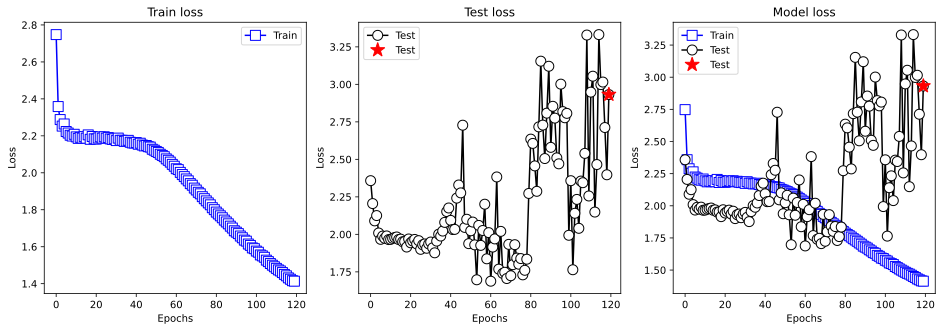

In [99]:
fig,ax = plt.subplots(1, 3, figsize=(16, 5))

# ax[0].plot(smooth(trainLoss))
# ax[0].plot(smooth(testLoss))
ax[0].plot(trainLoss1, 'sb-', markerfacecolor='w', markersize=10, label='Train')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Train loss')
ax[0].legend()



ax[1].plot(testLoss1, 'ko-', markerfacecolor='w', markersize=10, label='Test')
ax[1].plot(len(testLoss1) - 1, testLoss1[-1], 'r*', markersize=15, label='Test')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Test loss')
# ax[1].set_ylim([0, 0.5])
ax[1].legend()



ax[2].plot(trainLoss1, 'sb-', markerfacecolor='w', markersize=10, label='Train')
ax[2].plot(testLoss1, 'ko-', markerfacecolor='w', markersize=10, label='Test')
ax[2].plot(len(testLoss1) - 1, testLoss1[-1], 'r*', markersize=15, label='Test')

ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].set_title('Model loss')
ax[2].legend()




# plt.ylim([0,1])
# plt.xlim([-10,10]) # note: this actually clips two data points


plt.savefig("loss1.jpg", bbox_inches='tight')


plt.show()

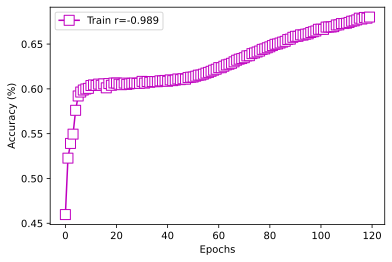

In [100]:
plt.plot(trainAcc1, 'ms-', markerfacecolor='w', markersize=10, label='Train')

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# correlations between predictions and outputs
corrTrain = np.corrcoef(yHat1.detach().T, y1.T) [1,0]

plt.legend([ f'Train r={corrTrain:0.3f}'])


plt.savefig("acc1.jpg", bbox_inches='tight')


plt.show()

In [101]:
data.leap_year.value_counts()

0    110960
1     35502
Name: leap_year, dtype: int64

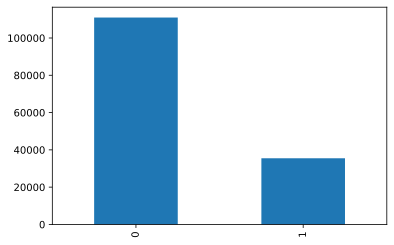

In [102]:
data.leap_year.value_counts().plot(kind="bar")

In [103]:
resampler = SMOTE(k_neighbors=20, random_state=0)

In [104]:
X_res, y_res = resampler.fit_resample(data[['day_code', 'month_code', 'decade', 'date_int']], data['leap_year'])

In [105]:
y_res.value_counts()

0    110960
1    110960
Name: leap_year, dtype: int64

In [106]:
data['leap_year'].value_counts()

0    110960
1     35502
Name: leap_year, dtype: int64

In [107]:
data

,day,month,leap_year,decade,date,date_int,day_code,day_scaled,day_sin,day_cos,month_code,month_scaled,month_sin,month_cos,decade_scaled,decade_sin,decade_cos
0,[WED],[JAN],0,180,1800-01-01,18000101,4,0.25,-0.433884,-0.900969,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
1,[THU],[JAN],0,180,1801-01-01,18010101,5,0.50,-0.974928,-0.222521,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
2,[FRI],[JAN],0,180,1802-01-01,18020101,6,0.75,-0.781831,0.623490,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
3,[SAT],[JAN],0,180,1803-01-01,18030101,0,-0.75,0.000000,1.000000,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
4,[SUN],[JAN],1,180,1804-01-01,18040101,1,-0.50,0.781831,0.623490,0,-1.000000,0.0,1.000000,-1.00,0.636242,-0.771489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,[SAT],[DEC],1,219,2196-12-31,21961231,0,-0.75,0.000000,1.000000,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568
146458,[SUN],[DEC],0,219,2197-12-31,21971231,1,-0.50,0.781831,0.623490,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568
146459,[MON],[DEC],0,219,2198-12-31,21981231,2,-0.25,0.974928,-0.222521,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568
146460,[TUE],[DEC],0,219,2199-12-31,21991231,3,0.00,0.433884,-0.900969,11,0.833333,-0.5,0.866025,0.95,0.839365,-0.543568


In [108]:
y_res

0         0
1         0
2         0
3         0
4         1
         ..
221915    1
221916    1
221917    1
221918    1
221919    1
Name: leap_year, Length: 221920, dtype: int64

In [109]:
X_res

,day_code,month_code,decade,date_int
0,4,0,180,18000101
1,5,0,180,18010101
2,6,0,180,18020101
3,0,0,180,18030101
4,1,0,180,18040101
...,...,...,...,...
221915,0,5,188,18880618
221916,2,6,188,18840705
221917,5,2,218,21800323
221918,1,5,199,19960602


In [110]:
X_smote = X_res.assign(leap_year=y_res)

In [111]:
X_smote

,day_code,month_code,decade,date_int,leap_year
0,4,0,180,18000101,0
1,5,0,180,18010101,0
2,6,0,180,18020101,0
3,0,0,180,18030101,0
4,1,0,180,18040101,1
...,...,...,...,...,...
221915,0,5,188,18880618,1
221916,2,6,188,18840705,1
221917,5,2,218,21800323,1
221918,1,5,199,19960602,1


Drop 220 decade

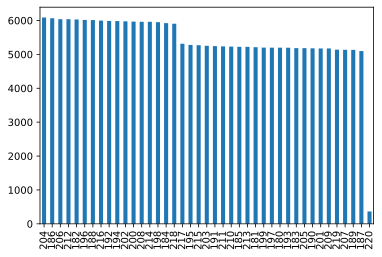

In [112]:
# data.decade.value_counts().plot(kind="bar")
X_smote.decade.value_counts().plot(kind="bar")

In [113]:
# data.decade.value_counts()[-5:]
X_smote.decade.value_counts()[-5:]

219    5139
207    5134
189    5133
187    5098
220     365
Name: decade, dtype: int64

In [114]:
X_smote = X_smote.drop(X_smote.index[X_smote['decade'] == 220]).reset_index(drop=True)
X_smote

,day_code,month_code,decade,date_int,leap_year
0,4,0,180,18000101,0
1,5,0,180,18010101,0
2,6,0,180,18020101,0
3,0,0,180,18030101,0
4,1,0,180,18040101,1
...,...,...,...,...,...
221550,0,5,188,18880618,1
221551,2,6,188,18840705,1
221552,5,2,218,21800323,1
221553,1,5,199,19960602,1


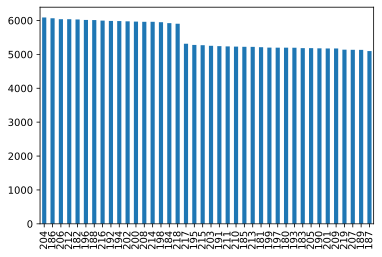

In [115]:
X_smote.decade.value_counts().plot(kind="bar")

In [116]:
X_smote.decade.value_counts()[-5:]

209    5174
219    5139
207    5134
189    5133
187    5098
Name: decade, dtype: int64

code is required to only work for dates in the range  [ 1-1-1800 to 31-12-2200 ]

In [117]:
X_smote.date_int.max()

21991231

In [118]:
datetime.datetime.strptime(str(X_smote.date_int.max()), '%Y%m%d').strftime('%d-%m-%Y')

'31-12-2199'

In [119]:
X_smote.date_int.min()

18000101

In [120]:
datetime.datetime.strptime(str(X_smote.date_int.min()), '%Y%m%d').strftime('%d-%m-%Y')

'01-01-1800'

In [121]:
Y_smote = X_smote['date_int']
Y_smote

0         18000101
1         18010101
2         18020101
3         18030101
4         18040101
            ...   
221550    18880618
221551    18840705
221552    21800323
221553    19960602
221554    21960520
Name: date_int, Length: 221555, dtype: int64

In [122]:
X_smote = X_smote.drop('date_int', axis=1).reset_index(drop=True)
X_smote

,day_code,month_code,decade,leap_year
0,4,0,180,0
1,5,0,180,0
2,6,0,180,0
3,0,0,180,0
4,1,0,180,1
...,...,...,...,...
221550,0,5,188,1
221551,2,6,188,1
221552,5,2,218,1
221553,1,5,199,1


In [123]:
Y_smote = Y_smote.reset_index(drop=True)

ls = []

for s in Y_smote.astype(str).to_list():

  l = list(s)

  ls.append(l)



arr = np.array(ls).astype(int)

ll = pd.DataFrame(arr, index=np.arange(len(Y_smote)), columns=['y1', 'y2', 'y3', 'y4', 'm1', 'm2', 'd1', 'd2'])


Y_smote = ll.values

Y_smote




array([[1, 8, 0, ..., 1, 0, 1],
       [1, 8, 0, ..., 1, 0, 1],
       [1, 8, 0, ..., 1, 0, 1],
       ...,
       [2, 1, 8, ..., 3, 2, 3],
       [1, 9, 9, ..., 6, 0, 2],
       [2, 1, 9, ..., 5, 2, 0]])

In [124]:
# data.index[data['leap_year'] == 1].tolist()
# data.index[data['leap_year'] == 1]

In [125]:
# for i,idx in enumerate(data['leap_year'].tolist()):
#     print(i, idx)

0 0
1 0
2 0
3 0
4 1 <---
5 0
6 0
7 0
8 1 <---
9 0
10 0
11 0
12 1 <---
13 0
14 0
15 0
16 1 <---
17 0
18 0
19 0
20 1 <---
21 0
22 0
23 0
24 1 <---
25 0
26 0
27 0
28 1 <---
29 0
30 0

In [126]:
scaler_day_smote = RobustScaler()

x = X_smote.day_code.values.reshape(-1, 1)

X_smote['day_scaled'] = scaler_day_smote.fit_transform(x).flatten()


In [127]:
X_smote['day_sin'] = np.sin(X_smote['day_code'] * (2 * np.pi / 7))
X_smote['day_cos'] = np.cos(X_smote['day_code'] * (2 * np.pi / 7))

In [128]:
X_smote

,day_code,month_code,decade,leap_year,day_scaled,day_sin,day_cos
0,4,0,180,0,0.333333,-0.433884,-0.900969
1,5,0,180,0,0.666667,-0.974928,-0.222521
2,6,0,180,0,1.000000,-0.781831,0.623490
3,0,0,180,0,-1.000000,0.000000,1.000000
4,1,0,180,1,-0.666667,0.781831,0.623490
...,...,...,...,...,...,...,...
221550,0,5,188,1,-1.000000,0.000000,1.000000
221551,2,6,188,1,-0.333333,0.974928,-0.222521
221552,5,2,218,1,0.666667,-0.974928,-0.222521
221553,1,5,199,1,-0.666667,0.781831,0.623490


In [129]:
scaler_month_smote = RobustScaler()

x = X_smote.month_code.values.reshape(-1, 1)

X_smote['month_scaled'] = scaler_month_smote.fit_transform(x).flatten()


In [130]:
X_smote['month_sin'] = np.sin(X_smote['month_code'] * (2 * np.pi / 12))
X_smote['month_cos'] = np.cos(X_smote['month_code'] * (2 * np.pi / 12))

In [131]:
X_smote

,day_code,month_code,decade,leap_year,day_scaled,day_sin,day_cos,month_scaled,month_sin,month_cos
0,4,0,180,0,0.333333,-0.433884,-0.900969,-1.000000,0.000000e+00,1.000000
1,5,0,180,0,0.666667,-0.974928,-0.222521,-1.000000,0.000000e+00,1.000000
2,6,0,180,0,1.000000,-0.781831,0.623490,-1.000000,0.000000e+00,1.000000
3,0,0,180,0,-1.000000,0.000000,1.000000,-1.000000,0.000000e+00,1.000000
4,1,0,180,1,-0.666667,0.781831,0.623490,-1.000000,0.000000e+00,1.000000
...,...,...,...,...,...,...,...,...,...,...
221550,0,5,188,1,-1.000000,0.000000,1.000000,-0.166667,5.000000e-01,-0.866025
221551,2,6,188,1,-0.333333,0.974928,-0.222521,0.000000,1.224647e-16,-1.000000
221552,5,2,218,1,0.666667,-0.974928,-0.222521,-0.666667,8.660254e-01,0.500000
221553,1,5,199,1,-0.666667,0.781831,0.623490,-0.166667,5.000000e-01,-0.866025


In [132]:
scaler_decade_smote = RobustScaler()

x = X_smote.decade.values.reshape(-1, 1)

X_smote['decade_scaled'] = scaler_decade_smote.fit_transform(x).flatten()


In [133]:
# alpha_smote = len(X_smote.decade.unique())
alpha_smote = (X_smote.decade.iloc[-1] - X_smote.decade.iloc[0]) + 1

X_smote['decade_sin'] = np.sin(X_smote['decade'] * (2 * np.pi / alpha_smote))
X_smote['decade_cos'] = np.cos(X_smote['decade'] * (2 * np.pi / alpha_smote))

In [134]:
X_smote

,day_code,month_code,decade,leap_year,day_scaled,day_sin,day_cos,month_scaled,month_sin,month_cos,decade_scaled,decade_sin,decade_cos
0,4,0,180,0,0.333333,-0.433884,-0.900969,-1.000000,0.000000e+00,1.000000,-1.052632,1.102182e-15,-1.000000
1,5,0,180,0,0.666667,-0.974928,-0.222521,-1.000000,0.000000e+00,1.000000,-1.052632,1.102182e-15,-1.000000
2,6,0,180,0,1.000000,-0.781831,0.623490,-1.000000,0.000000e+00,1.000000,-1.052632,1.102182e-15,-1.000000
3,0,0,180,0,-1.000000,0.000000,1.000000,-1.000000,0.000000e+00,1.000000,-1.052632,1.102182e-15,-1.000000
4,1,0,180,1,-0.666667,0.781831,0.623490,-1.000000,0.000000e+00,1.000000,-1.052632,1.102182e-15,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221550,0,5,188,1,-1.000000,0.000000,1.000000,-0.166667,5.000000e-01,-0.866025,-0.631579,-9.510565e-01,-0.309017
221551,2,6,188,1,-0.333333,0.974928,-0.222521,0.000000,1.224647e-16,-1.000000,-0.631579,-9.510565e-01,-0.309017
221552,5,2,218,1,0.666667,-0.974928,-0.222521,-0.666667,8.660254e-01,0.500000,0.947368,3.090170e-01,-0.951057
221553,1,5,199,1,-0.666667,0.781831,0.623490,-0.166667,5.000000e-01,-0.866025,-0.052632,-1.564345e-01,0.987688


In [135]:
# fig,ax = plt.subplots(1,figsize=(17,4))

# ax = sns.boxplot(data=X_smote[['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
#           'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']])

# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# plt.show()

In [136]:
X = X_smote[['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
             'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']].values
X

array([[ 3.33333333e-01, -4.33883739e-01, -9.00968868e-01, ...,
        -1.05263158e+00,  1.10218212e-15, -1.00000000e+00],
       [ 6.66666667e-01, -9.74927912e-01, -2.22520934e-01, ...,
        -1.05263158e+00,  1.10218212e-15, -1.00000000e+00],
       [ 1.00000000e+00, -7.81831482e-01,  6.23489802e-01, ...,
        -1.05263158e+00,  1.10218212e-15, -1.00000000e+00],
       ...,
       [ 6.66666667e-01, -9.74927912e-01, -2.22520934e-01, ...,
         9.47368421e-01,  3.09016994e-01, -9.51056516e-01],
       [-6.66666667e-01,  7.81831482e-01,  6.23489802e-01, ...,
        -5.26315789e-02, -1.56434465e-01,  9.87688341e-01],
       [-6.66666667e-01,  7.81831482e-01,  6.23489802e-01, ...,
         1.00000000e+00,  1.56434465e-01, -9.87688341e-01]])

In [137]:
X.shape

(221555, 10)

In [138]:
# Y = data['date_int'].values.reshape(-1, 1)
# Y = np.log(data['date_int'].values.reshape(-1, 1))
# Y = data['date_int'].values.reshape(-1, 1) / data['date_int'].max()
# Y = data['date_normalized'].values.reshape(-1, 1)
Y = Y_smote


Y

array([[1, 8, 0, ..., 1, 0, 1],
       [1, 8, 0, ..., 1, 0, 1],
       [1, 8, 0, ..., 1, 0, 1],
       ...,
       [2, 1, 8, ..., 3, 2, 3],
       [1, 9, 9, ..., 6, 0, 2],
       [2, 1, 9, ..., 5, 2, 0]])

In [139]:
Y.shape

(221555, 8)

In [140]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, shuffle=True,
                                                                    random_state=0)

In [141]:
train_dataT = TensorDataset( torch.tensor(train_data).float(), torch.tensor(train_labels).float() )

test_dataT  = TensorDataset( torch.tensor(test_data).float(), torch.tensor(test_labels).float() )



batchsize = 32
# batchsize = 64

train_loader = DataLoader(train_dataT, batch_size=batchsize, drop_last=True)

test_loader  = DataLoader(test_dataT)


In [142]:
print(f'X: {X.shape}\n')
print(f'Y: {Y.shape}\n')

print(f'Train data:   {train_data.shape}\n')
print(f'Train labels: {train_labels.shape}\n')
print(f'Test data:    {test_data.shape}\n')
print(f'Test labels:  {test_labels.shape}')

X: (221555, 10)

Y: (221555, 8)

Train data:   (155088, 10)

Train labels: (155088, 8)

Test data:    (66467, 10)

Test labels:  (66467, 8)


In [143]:
model_smote = Model().to(device)


# checkpoint = torch.load('checkpoint.pth.tar', map_location=torch.device('cpu'))
# model_smote.load_state_dict(checkpoint['model_smote_state_dict'])




In [144]:
numepochs = 120
# numepochs = 300
# numepochs = 500



trainLoss, testLoss, trainAcc, yHat, y, yHat_test, yy = train(model_smote, numepochs)


Epoch 1/120, Train Loss: 2.030803, Test Loss: 4.566076
Epoch 2/120, Train Loss: 1.928650, Test Loss: 4.132753
Epoch 3/120, Train Loss: 1.920810, Test Loss: 4.104535
Epoch 4/120, Train Loss: 1.899002, Test Loss: 4.035106
Epoch 5/120, Train Loss: 1.915750, Test Loss: 4.001500
Epoch 6/120, Train Loss: 1.912858, Test Loss: 3.962472
Epoch 7/120, Train Loss: 1.919810, Test Loss: 4.001203
Epoch 8/120, Train Loss: 1.895635, Test Loss: 4.063961
Epoch 9/120, Train Loss: 1.913962, Test Loss: 4.096409
Epoch 10/120, Train Loss: 1.910111, Test Loss: 4.244309
Epoch 11/120, Train Loss: 1.900544, Test Loss: 4.249809
Epoch 12/120, Train Loss: 1.904951, Test Loss: 4.275436
Epoch 13/120, Train Loss: 1.893090, Test Loss: 4.284489
Epoch 14/120, Train Loss: 1.914473, Test Loss: 4.297169
Epoch 15/120, Train Loss: 1.918617, Test Loss: 4.313251
Epoch 16/120, Train Loss: 1.933944, Test Loss: 4.307733
Epoch 17/120, Train Loss: 2.615611, Test Loss: 4.288871
Epoch 18/120, Train Loss: 1.909159, Test Loss: 4.235250
E

In [145]:
trainLoss, testLoss, trainAcc

(tensor([2.5021, 2.2340, 2.2151, 2.1880, 2.1824, 2.1802, 2.1726, 2.1709, 2.1663,
         2.1612, 2.1593, 2.1532, 2.1528, 2.1490, 2.1485, 2.1504, 2.1457, 2.1470,
         2.1423, 2.1423, 2.1417, 2.1416, 2.1401, 2.1413, 2.1393, 2.1374, 2.1369,
         2.1352, 2.1345, 2.1337, 2.1316, 2.1308, 2.1274, 2.1268, 2.1228, 2.1201,
         2.1179, 2.1151, 2.1110, 2.1071, 2.1028, 2.0984, 2.0935, 2.0871, 2.0823,
         2.0770, 2.0704, 2.0651, 2.0589, 2.0535, 2.0469, 2.0391, 2.0318, 2.0274,
         2.0191, 2.0118, 2.0073, 1.9986, 1.9921, 1.9861, 1.9773, 1.9702, 1.9623,
         1.9547, 1.9462, 1.9396, 1.9314, 1.9238, 1.9195, 1.9108, 1.9016, 1.8968,
         1.8877, 1.8812, 1.8734, 1.8655, 1.8574, 1.8499, 1.8465, 1.8357, 1.8312,
         1.8243, 1.8153, 1.8095, 1.8023, 1.7964, 1.7906, 1.7847, 1.7775, 1.7716,
         1.7650, 1.7592, 1.7528, 1.7453, 1.7392, 1.7349, 1.7280, 1.7224, 1.7162,
         1.7114, 1.7038, 1.6983, 1.6925, 1.6880, 1.6820, 1.6745, 1.6710, 1.6632,
         1.6587, 1.6535, 1.6

In [146]:
# (yy * data['date_int'].max()).round()

In [147]:
# (yHat_test * data['date_int'].max()).round()

In [148]:
print_score(X.shape, yHat, y, yHat_test, yy)

Adjusted R-Squared(y, yHat): 0.5342


mean_absolute_error(y, yHat): 0.5938

mean_absolute_error(yy, yHat_test): 1.2024


mean_squared_error(y, yHat): 1.3345

mean_squared_error(yy, yHat_test): 4.7816


mean_squared_log_error(y, yHat): 0.0883

mean_squared_log_error(yy, yHat_test): 0.4565


RMSE(y, yHat): 1.1552

RMSE(yy, yHat_test): 2.1867




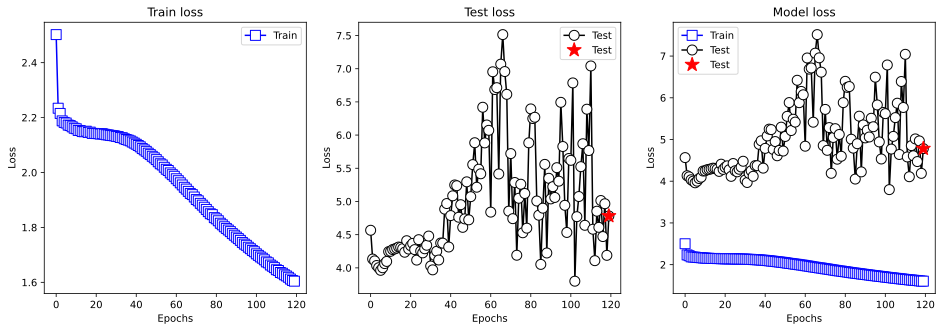

In [149]:
fig,ax = plt.subplots(1, 3, figsize=(16, 5))

# ax[0].plot(smooth(trainLoss))
# ax[0].plot(smooth(testLoss))
ax[0].plot(trainLoss, 'sb-', markerfacecolor='w', markersize=10, label='Train')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Train loss')
ax[0].legend()



ax[1].plot(testLoss, 'ko-', markerfacecolor='w', markersize=10, label='Test')
ax[1].plot(len(testLoss) - 1, testLoss[-1], 'r*', markersize=15, label='Test')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Test loss')
# ax[1].set_ylim([0, 0.5])
ax[1].legend()



ax[2].plot(trainLoss, 'sb-', markerfacecolor='w', markersize=10, label='Train')
ax[2].plot(testLoss, 'ko-', markerfacecolor='w', markersize=10, label='Test')
ax[2].plot(len(testLoss) - 1, testLoss[-1], 'r*', markersize=15, label='Test')

ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].set_title('Model loss')
ax[2].legend()




# plt.ylim([0,1])
# plt.xlim([-10,10]) # note: this actually clips two data points


plt.savefig("loss2.jpg", bbox_inches='tight')


plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


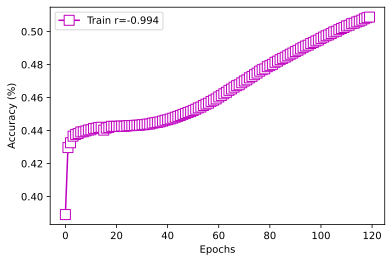

In [150]:
plt.plot(trainAcc, 'ms-', markerfacecolor='w', markersize=10, label='Train')

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# correlations between predictions and outputs
corrTrain = np.corrcoef(yHat.detach().T, y.T) [1,0]

plt.legend([ f'Train r={corrTrain:0.3f}'])


plt.savefig("acc2.jpg", bbox_inches='tight')


plt.show()

In [151]:
['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
             'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']

['day_scaled',
 'day_sin',
 'day_cos',
 'month_scaled',
 'month_sin',
 'month_cos',
 'leap_year',
 'decade_scaled',
 'decade_sin',
 'decade_cos']

In [152]:
def result_to_date(result):
    
    result = str(result)
    
    day   = int(result[6:]) - 1
    month = int(result[4:6]) - 1

    ss = str(f'{result[:4]}0101')
    
    ds = datetime.datetime.strptime(ss, '%Y%m%d')
    
    ds = ds + relativedelta(months=month, days=day)

    result = ds.strftime('%d-%m-%Y')
    
    
    return result

In [153]:
# (16830739, 17848869)
result_to_date(16830739), result_to_date(17848869)

('08-08-1683', '08-06-1791')

In [154]:
def test_model(input_list):
    

    X       = np.zeros((1, 10))
    X_smote = np.zeros((1, 10))



    day       = np.array(map_day[input_list[0]])
    month     = np.array(map_month[input_list[1]])
    leap_year = map_leap_year[input_list[2]]
    decade    = np.array(input_list[3].strip('[]')).astype('int64')


    X[0, 0] = scaler_day.transform(day.reshape(-1, 1)).flatten()
    X[0, 1] = np.sin(day * (2 * np.pi / 7))
    X[0, 2] = np.cos(day * (2 * np.pi / 7))

    X[0, 3] = scaler_month.transform(month.reshape(-1, 1)).flatten()
    X[0, 4] = np.sin(month * (2 * np.pi / 12))
    X[0, 5] = np.cos(month * (2 * np.pi / 12))

    X[0, 6] = leap_year

    X[0, 7] = scaler_decade.transform(decade.reshape(-1, 1)).flatten()
    X[0, 8] = np.sin(decade * (2 * np.pi / alpha))
    X[0, 9] = np.cos(decade * (2 * np.pi / alpha))

    # ---

    X_smote[0, 0] = scaler_day_smote.transform(day.reshape(-1, 1)).flatten()
    X_smote[0, 1] = X[0, 1]
    X_smote[0, 2] = X[0, 2]

    X_smote[0, 3] = scaler_month_smote.transform(month.reshape(-1, 1)).flatten()
    X_smote[0, 4] = X[0, 4]
    X_smote[0, 5] = X[0, 5]

    X_smote[0, 6] = leap_year

    X_smote[0, 7] = scaler_decade_smote.transform(decade.reshape(-1, 1)).flatten()
    X_smote[0, 8] = np.sin(decade * (2 * np.pi / alpha_smote))
    X_smote[0, 9] = np.cos(decade * (2 * np.pi / alpha_smote))



    flag = [model.training, model_smote.training]

    # ---

    model.eval()
    model_smote.eval()


    result       = model(torch.tensor(X).to(device).float())
    result_smote = model_smote(torch.tensor(X_smote).to(device).float())



    # if all(flag):
    #   model.train()
    #   model_smote.train()


    if flag[0]:
      model.train()

    if flag[1]:
      model_smote.train()


    # ---


    result       = ''.join(result.detach().cpu().numpy().round().astype(int).astype(str).flatten())
    result_smote = ''.join(result_smote.detach().cpu().numpy().round().astype(int).astype(str).flatten())

    
    
    return result_to_date(result), result_to_date(result_smote)





In [155]:
input_test1 = ['[MON]', '[DEC]', '[False]', '[196]']
output_test1 = '3-12-1962'

input_test2 = ['[THU]', '[DEC]', '[True]', '[204]']
output_test2 = '3-12-2048'

input_test3 = ['[WED]', '[JAN]', '[False]', '[181]']
output_test3 = '10-1-1810'


input_test4 = ['[WED]', '[JUN]', '[False]', '[209]']



In [156]:
test_model(input_test1), test_model(input_test2), test_model(input_test3), test_model(input_test4)

(('15-12-1965', '14-02-1964'),
 ('15-12-2047', '15-02-2046'),
 ('14-01-1816', '14-01-1813'),
 ('15-06-2087', '13-06-2095'))

In [157]:
output_test1, output_test2, output_test3

('3-12-1962', '3-12-2048', '10-1-1810')

In [158]:
# example_input = pd.read_csv('./data/example_input.txt', sep=' ', header=None)
example_input = pd.read_csv('example_input.txt', sep=' ', header=None)


example_input.columns = ['day', 'month', 'leap_year', 'decade']


In [159]:
example_input

,day,month,leap_year,decade
0,[WED],[JAN],[False],[180]
1,[MON],[JAN],[False],[190]
2,[SAT],[JAN],[True],[200]
3,[FRI],[JAN],[False],[210]
4,[WED],[JAN],[False],[220]
...,...,...,...,...
1460,[MON],[OCT],[True],[214]
1461,[TUE],[DEC],[False],[183]
1462,[SUN],[DEC],[False],[193]
1463,[SAT],[DEC],[False],[203]


In [160]:
R       = pd.DataFrame(np.nan, index=np.arange(len(example_input)), columns=['result'])
R_smote = pd.DataFrame(np.nan, index=np.arange(len(example_input)), columns=['result_smote'])

In [161]:
example_input.iloc[0].tolist()

['[WED]', '[JAN]', '[False]', '[180]']

In [162]:
for i in range(len(example_input)):
    R.iloc[i], R_smote.iloc[i] = test_model(example_input.iloc[i].tolist())

In [163]:
R

,result
0,14-01-1806
1,15-01-1904
2,15-01-2008
3,15-01-2102
4,14-01-2400
...,...
1460,14-10-2143
1461,15-12-1836
1462,15-12-1934
1463,15-12-2035


In [164]:
final = pd.concat([example_input, R], axis=1)
final

,day,month,leap_year,decade,result
0,[WED],[JAN],[False],[180],14-01-1806
1,[MON],[JAN],[False],[190],15-01-1904
2,[SAT],[JAN],[True],[200],15-01-2008
3,[FRI],[JAN],[False],[210],15-01-2102
4,[WED],[JAN],[False],[220],14-01-2400
...,...,...,...,...,...
1460,[MON],[OCT],[True],[214],14-10-2143
1461,[TUE],[DEC],[False],[183],15-12-1836
1462,[SUN],[DEC],[False],[193],15-12-1934
1463,[SAT],[DEC],[False],[203],15-12-2035


In [165]:
final_smote = pd.concat([example_input, R_smote], axis=1)
final_smote

,day,month,leap_year,decade,result_smote
0,[WED],[JAN],[False],[180],15-01-1805
1,[MON],[JAN],[False],[190],15-01-1903
2,[SAT],[JAN],[True],[200],13-01-2003
3,[FRI],[JAN],[False],[210],16-01-2103
4,[WED],[JAN],[False],[220],15-01-2196
...,...,...,...,...,...
1460,[MON],[OCT],[True],[214],15-12-2144
1461,[TUE],[DEC],[False],[183],15-02-1834
1462,[SUN],[DEC],[False],[193],15-02-1933
1463,[SAT],[DEC],[False],[203],14-02-2036


In [166]:
final.to_csv('output_file.txt', sep=' ', header=None, index=False)

In [167]:
final_smote.to_csv('output_file_smote.txt', sep=' ', header=None, index=False)

Out-liers

Saving

In [168]:
checkpoint = {'model_state_dict'      : model.state_dict(),
              'model_smote_state_dict': model_smote.state_dict(),

              'scaler_day' : scaler_day,
              'scaler_month' : scaler_month,
              'scaler_decade' : scaler_decade,

              'scaler_day_smote' : scaler_day_smote,
              'scaler_month_smote' : scaler_month_smote,
              'scaler_decade_smote' : scaler_decade_smote,
              
              'alpha': alpha,
              'alpha_smote': alpha_smote}



torch.save(checkpoint, 'checkpoint.pth.tar')


In [169]:
# checkpoint = torch.load('checkpoint.pth.tar')

In [170]:

# model       = Model()
# model_smote = Model()


# model.load_state_dict(checkpoint['model_state_dict'])
# model_smote.load_state_dict(checkpoint['model_smote_state_dict'])

